PYTHON

In [1]:
import pandas as pd
from datetime import datetime
from privatefunctions import add6ColFile, add8ColFile, add12ColFile, add14ColFile

In [2]:
## Git clonning and pulling:

print('***', 'GETTING FILES FROM Johns Hopkins University ...')

!git clone https://github.com/CSSEGISandData/COVID-19
%cd './COVID-19'
!git pull
!ls
%cd ..
!ls

*** GETTING FILES FROM Johns Hopkins University ...
fatal: destination path 'COVID-19' already exists and is not an empty directory.
/Users/adrianosastre/datascience-covid-19/COVID-19
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 7 (delta 5), reused 7 (delta 5), pack-reused 0
Unpacking objects: 100% (7/7), done.
From https://github.com/CSSEGISandData/COVID-19
   b3b4ea97..5320b236  web-data   -> origin/web-data
Already up to date.
README.md                      csse_covid_19_data
archived_data                  who_covid_19_situation_reports
/Users/adrianosastre/datascience-covid-19
COVID-19               covid-19.ipynb         standardplot.py
Pandas_Cheat_Sheet.pdf hello.py
__pycache__            privatefunctions.py


In [3]:
## Getting csv data:
daily_reports_path = './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
csv_file_names = !ls $daily_reports_path | grep .csv

print('***', len(csv_file_names), 'DAILY FILES IN Johns Hopkins University.')

*** 144 DAILY FILES IN Johns Hopkins University.


In [4]:
main_df = pd.DataFrame(
  columns=[
    'Date', 
    'City', 
    'State', 
    'Country', 
    'Latitude', 
    'Longitude', 
    'TotalConfirmed', 
    'TotalDeaths', 
    'TotalRecovered', 
    'TotalActive', 
    'CaseFatalityRatio', 
    'IncidenceRate', 
    'MortalityRate']) 

print('*** INITIAL MAIN DATAFRAME: ')

print(main_df.shape)
print(main_df.dtypes)

print('*** WILL START GETTING DATA FROM Johns Hopkins University AND NORMALIZE COLUMNS NAMES: ')

# 1 file per day:
for file in csv_file_names:

  file_path = daily_reports_path + file

  # read daily csv data:
  df = pd.read_csv(daily_reports_path + file)

  # get date from file name:
  date = datetime.strptime(file[0:-4], '%m-%d-%Y').date()

  print('*** DATE:', date, df.shape[0], 'lines,', df.shape[1], 'columns ...')

  # 6-columns file format:
  if df.shape[1] == 6 : 
    main_df = add6ColFile(date, df, main_df)

  # 8-columns file format:
  elif df.shape[1] == 8 :
    main_df = add8ColFile(date, df, main_df)

  # 12-columns file format:
  elif df.shape[1] == 12 :
    main_df = add12ColFile(date, df, main_df)
    
  # 14-columns file format:
  elif df.shape[1] == 14 :
    main_df = add14ColFile(date, df, main_df)

  new_index = range(main_df.shape[0])
  main_df.index = new_index

  main_df['Country'] = main_df['Country'].replace('Mainland China', 'China')

  main_df['TotalConfirmed'] = main_df['TotalConfirmed'].fillna(0)
  main_df['TotalDeaths'] = main_df['TotalDeaths'].fillna(0)
  main_df['TotalRecovered'] = main_df['TotalRecovered'].fillna(0)
  main_df['TotalActive'] = main_df['TotalActive'].fillna(0)

print('*** MAIN DATAFRAME AFTER GETTING DATA FROM Johns Hopkins University: ')

print(main_df.shape)
print(main_df.dtypes)


*** INITIAL MAIN DATAFRAME: 
(0, 13)
Date                 object
City                 object
State                object
Country              object
Latitude             object
Longitude            object
TotalConfirmed       object
TotalDeaths          object
TotalRecovered       object
TotalActive          object
CaseFatalityRatio    object
IncidenceRate        object
MortalityRate        object
dtype: object
*** WILL START GETTING DATA FROM Johns Hopkins University AND NORMALIZE COLUMNS NAMES: 
*** DATE: 2020-01-22 38 lines, 6 columns ...
*** DATE: 2020-01-23 46 lines, 6 columns ...
*** DATE: 2020-01-24 41 lines, 6 columns ...
*** DATE: 2020-01-25 44 lines, 6 columns ...
*** DATE: 2020-01-26 47 lines, 6 columns ...
*** DATE: 2020-01-27 51 lines, 6 columns ...
*** DATE: 2020-01-28 52 lines, 6 columns ...
*** DATE: 2020-01-29 54 lines, 6 columns ...
*** DATE: 2020-01-30 58 lines, 6 columns ...
*** DATE: 2020-01-31 62 lines, 6 columns ...
*** DATE: 2020-02-01 67 lines, 6 columns ...
**

In [5]:
print('*** WILL GROUP BY COUNTRIES ...')

df_country_group = main_df.groupby(['Date', 'Country']).agg(
    {
      'TotalConfirmed':'sum',
      'TotalDeaths':'sum',
      'TotalRecovered':'sum',
      'TotalActive':'sum'
    }
  ).reset_index()

df_country_group['DailyConfirmed'] = 0
df_country_group['DailyDeaths'] = 0
df_country_group['DailyRecovered'] = 0
df_country_group['DailyActive'] = 0

print('*** GROUPED BY COUNTRIES DATAFRAME: ')

print(df_country_group.shape)
print(df_country_group.dtypes)


*** WILL GROUP BY COUNTRIES ...
*** GROUPED BY COUNTRIES DATAFRAME: 
(19261, 10)
Date               object
Country            object
TotalConfirmed    float64
TotalDeaths       float64
TotalRecovered    float64
TotalActive       float64
DailyConfirmed      int64
DailyDeaths         int64
DailyRecovered      int64
DailyActive         int64
dtype: object


In [6]:
print('*** WILL FILTER BRAZIL ONLY ...')

df_brazil = df_country_group.loc[df_country_group['Country'] == 'Brazil']

new_index = range(df_brazil.shape[0])
df_brazil.index = new_index

print(df_brazil.shape)
print(df_brazil.dtypes)

*** WILL FILTER BRAZIL ONLY ...
(110, 10)
Date               object
Country            object
TotalConfirmed    float64
TotalDeaths       float64
TotalRecovered    float64
TotalActive       float64
DailyConfirmed      int64
DailyDeaths         int64
DailyRecovered      int64
DailyActive         int64
dtype: object


In [7]:
print('*** WILL CALCULATE DAILY NUMBERS FOR BRAZIL DATAFRAME ... ')

for i in range(1, len(df_brazil)):
    df_brazil.loc[i, 'DailyConfirmed'] = df_brazil.loc[i, 'TotalConfirmed'] - df_brazil.loc[i-1, 'TotalConfirmed']
    df_brazil.loc[i, 'DailyDeaths'] = df_brazil.loc[i, 'TotalDeaths'] - df_brazil.loc[i-1, 'TotalDeaths']
    df_brazil.loc[i, 'DailyRecovered'] = df_brazil.loc[i, 'TotalRecovered'] - df_brazil.loc[i-1, 'TotalRecovered']
    df_brazil.loc[i, 'DailyActive'] = df_brazil.loc[i, 'TotalActive'] - df_brazil.loc[i-1, 'TotalActive']

print('*** BRAZIL DATAFRAME AFTER CALCULATING DAILY NUMBERS: ')

print(df_brazil.shape)
print(df_brazil.dtypes)


*** WILL CALCULATE DAILY NUMBERS FOR BRAZIL DATAFRAME ... 
*** BRAZIL DATAFRAME AFTER CALCULATING DAILY NUMBERS: 
(110, 10)
Date               object
Country            object
TotalConfirmed    float64
TotalDeaths       float64
TotalRecovered    float64
TotalActive       float64
DailyConfirmed    float64
DailyDeaths       float64
DailyRecovered    float64
DailyActive       float64
dtype: object


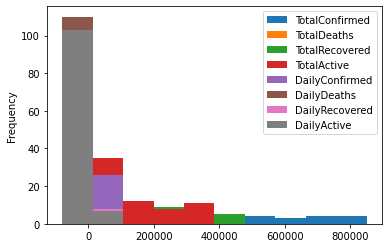

In [18]:
df_brazil.plot.hist()


In [22]:
df.plot.scatter(y='DailyDeaths',x='DailyConfirmed')

KeyError: 'DailyConfirmed'